In [5]:
# ============================
# 1. Setup
# ============================
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# ============================
# 2. Dataset Paths
# ============================
# Adjust this path dependngly
dataset_path = r"C:\Users\shara\Downloads\DMML-GRP-14-main\DMML-GRP-14-main\Image Datasets\PreProcessing\Processed-Image_Dataset"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

print("Train dir:", train_dir)
print("Test dir:", test_dir)


Train dir: C:\Users\shara\Downloads\DMML-GRP-14-main\DMML-GRP-14-main\Image Datasets\PreProcessing\Processed-Image_Dataset\train
Test dir: C:\Users\shara\Downloads\DMML-GRP-14-main\DMML-GRP-14-main\Image Datasets\PreProcessing\Processed-Image_Dataset\test


In [6]:
# ============================
# 3. Class Names
# ============================
class_names = sorted(os.listdir(train_dir))
print("Classes:", class_names)
print("Number of classes:", len(class_names))


Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
Number of classes: 7


Train counts: {'Potato___Early_blight': 700, 'Potato___Late_blight': 700, 'Potato___healthy': 931, 'Tomato_Bacterial_spot': 1488, 'Tomato_Early_blight': 700, 'Tomato_Late_blight': 1336, 'Tomato_healthy': 1113}
Test counts: {'Potato___Early_blight': 300, 'Potato___Late_blight': 300, 'Potato___healthy': 400, 'Tomato_Bacterial_spot': 639, 'Tomato_Early_blight': 300, 'Tomato_Late_blight': 573, 'Tomato_healthy': 478}


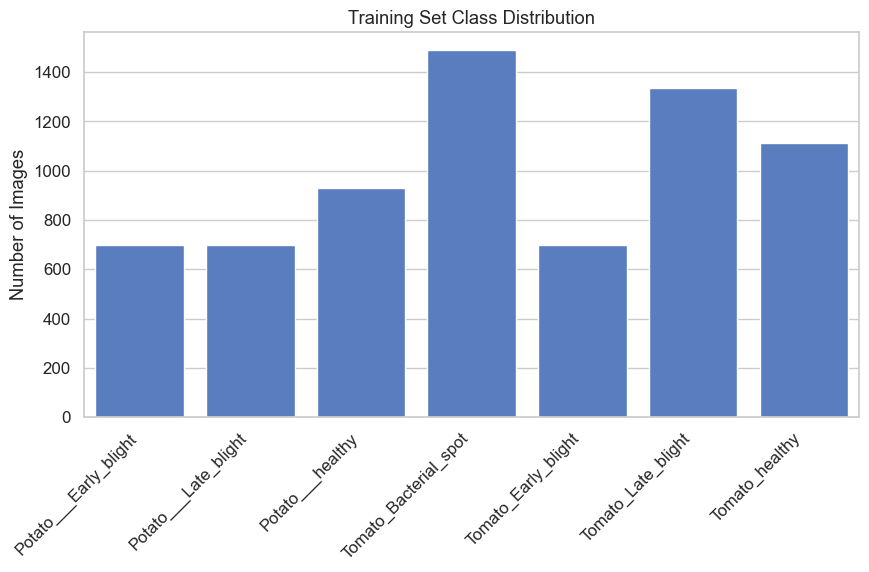

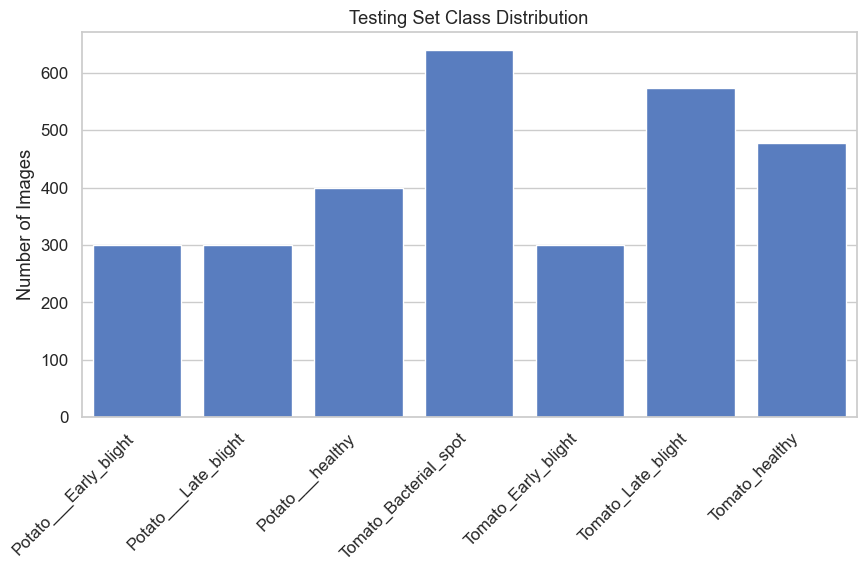

In [7]:
# ============================
# 4. Count Images per Class
# ============================
def count_images_per_class(base_dir):
    counts = {}
    for class_name in class_names:
        class_path = os.path.join(base_dir, class_name)
        counts[class_name] = len([
            f for f in os.listdir(class_path) 
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
    return counts

train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

print("Train counts:", train_counts)
print("Test counts:", test_counts)

# Plot class distribution
plt.figure(figsize=(10,5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()))
plt.title("Training Set Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()))
plt.title("Testing Set Class Distribution")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.show()


Sampled image sizes (width x height):
Mean: [256. 256.]
Median: [256. 256.]
Unique sizes: [[256 256]]


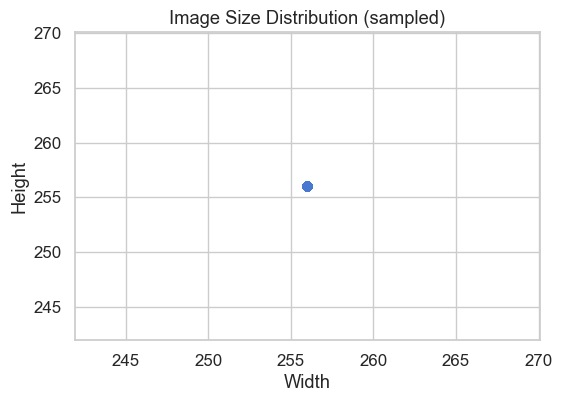

In [8]:
# ============================
# 5. Image Size Analysis
# ============================
sizes = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for f in os.listdir(class_path)[:50]:  # sample first 50 per class
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(os.path.join(class_path, f))
            sizes.append(img.size)

sizes = np.array(sizes)
print("Sampled image sizes (width x height):")
print("Mean:", sizes.mean(axis=0))
print("Median:", np.median(sizes, axis=0))
print("Unique sizes:", np.unique(sizes, axis=0)[:10])  # show first 10 unique

plt.figure(figsize=(6,4))
plt.scatter(sizes[:,0], sizes[:,1], alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution (sampled)")
plt.show()


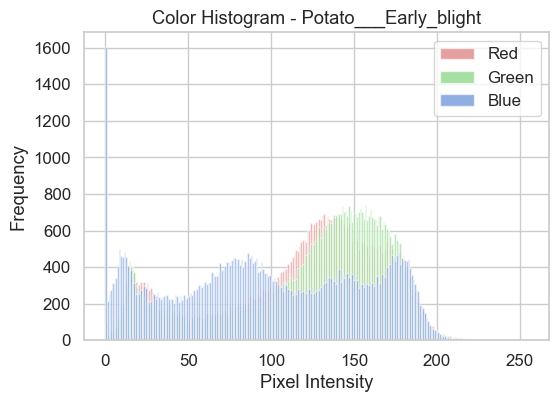

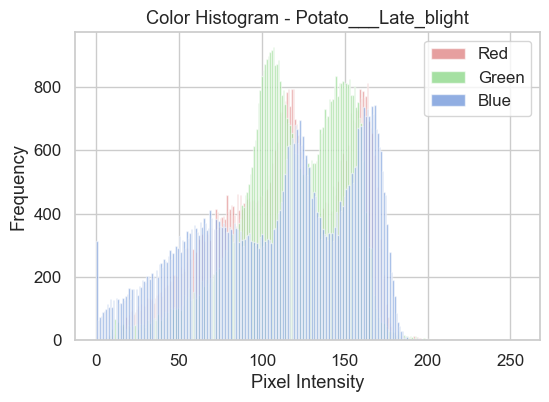

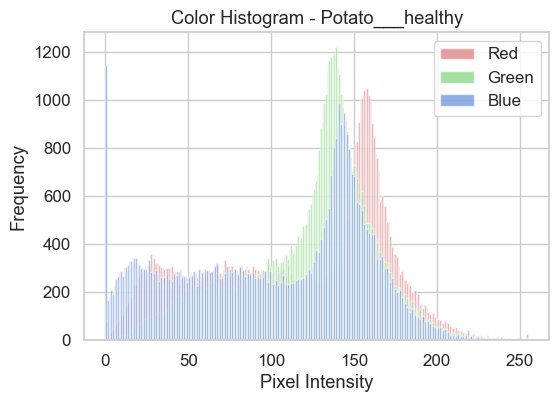

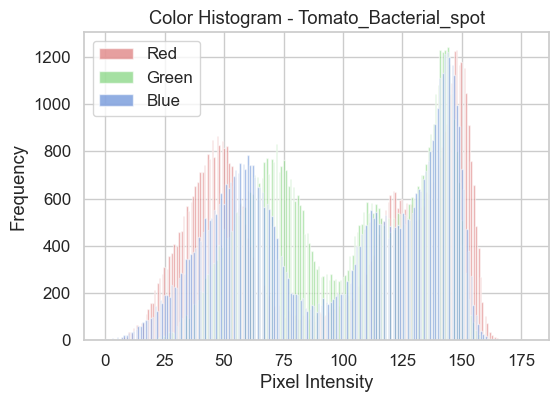

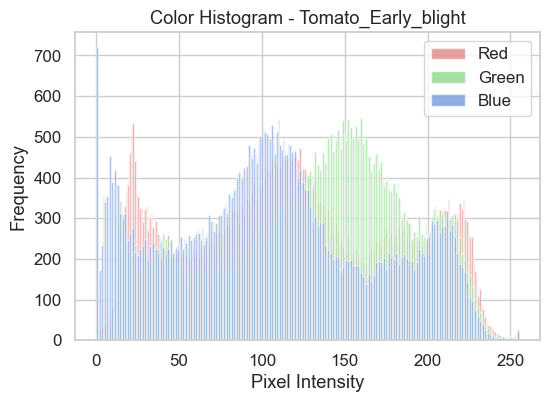

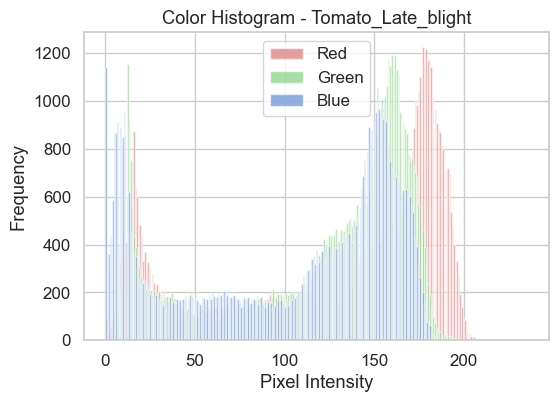

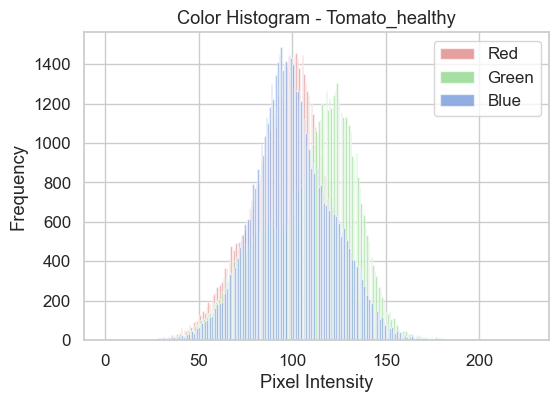

In [11]:
# 7. Color Distribution Analysis (No OpenCV)
import numpy as np

def plot_rgb_histogram_pil(image, class_name):
    """Plot RGB histogram for a single image using PIL + numpy."""
    img_array = np.array(image)
    colors = ("r", "g", "b")
    channel_names = ("Red", "Green", "Blue")

    plt.figure(figsize=(6,4))
    plt.title(f"Color Histogram - {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    for i, color in enumerate(colors):
        plt.hist(img_array[:,:,i].ravel(), bins=256, color=color, alpha=0.6, label=channel_names[i])

    plt.legend()
    plt.show()

# Example: plot one sample per class
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    sample_file = [f for f in os.listdir(class_path) if f.lower().endswith(('.png','.jpg','.jpeg'))][0]
    img = Image.open(os.path.join(class_path, sample_file)).convert("RGB")
    plot_rgb_histogram_pil(img, class_name)


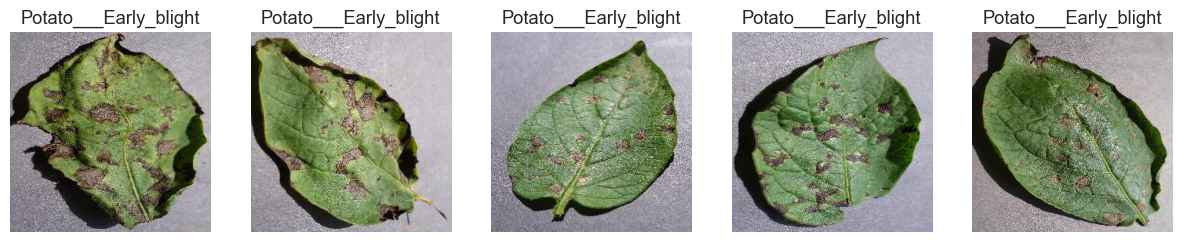

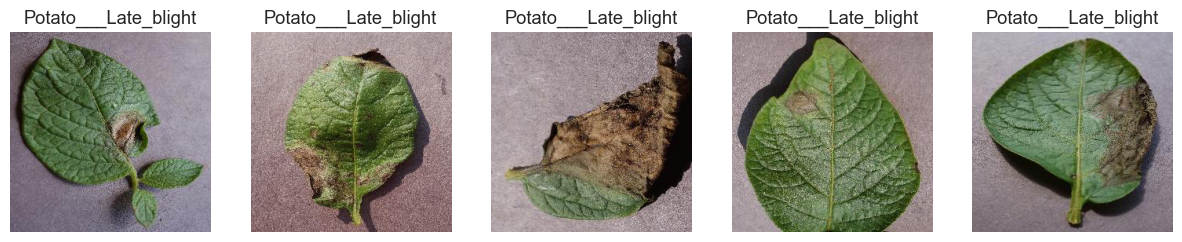

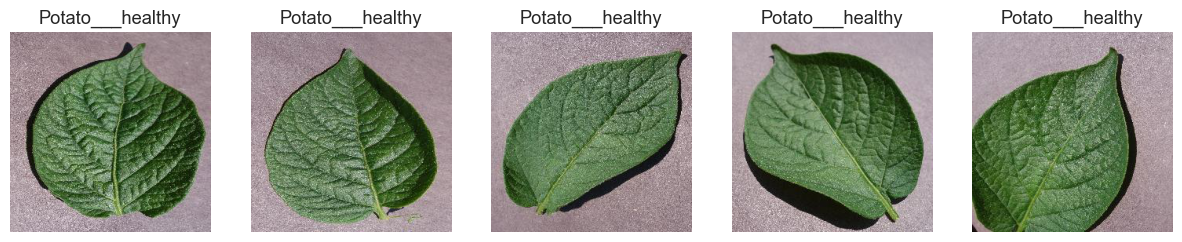

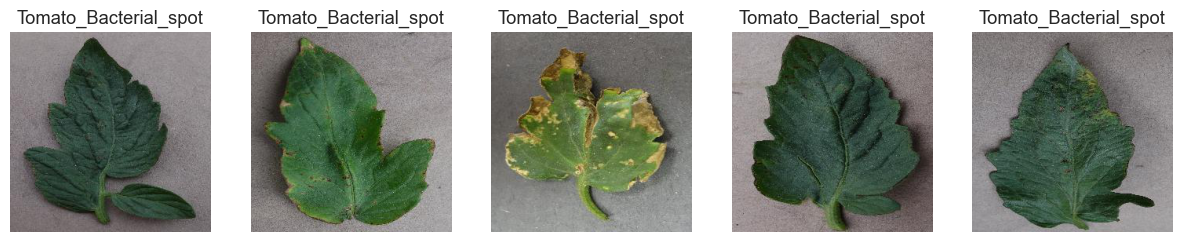

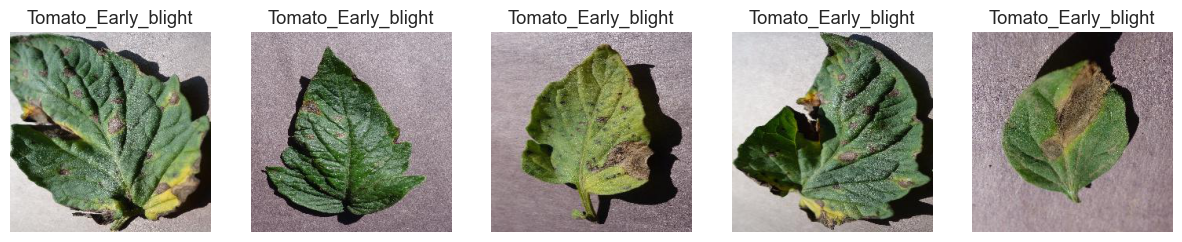

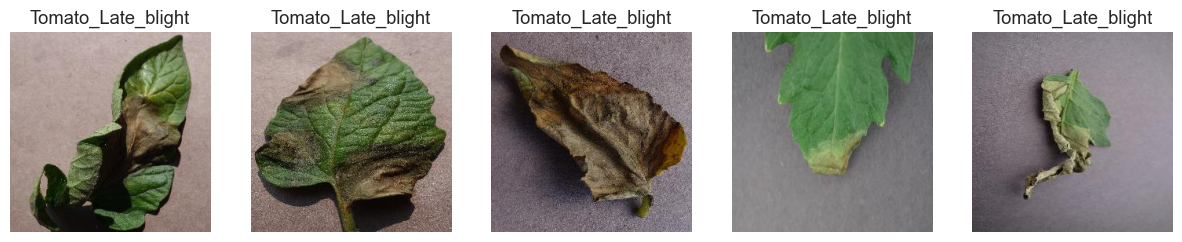

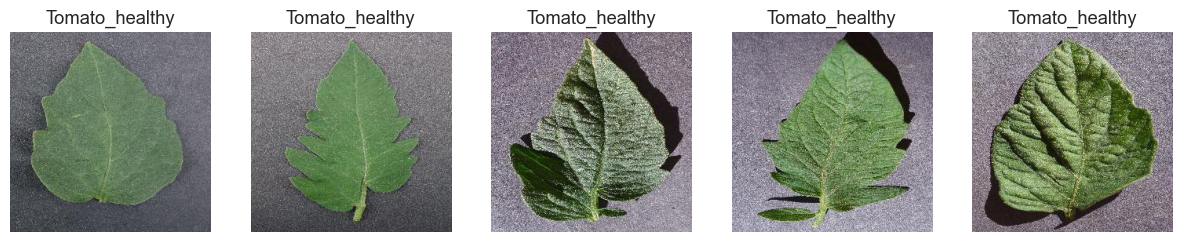

In [9]:
# ============================
# 6. Show Sample Images
# ============================
def show_samples(base_dir, class_name, n=5):
    class_path = os.path.join(base_dir, class_name)
    files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png','.jpg','.jpeg'))]
    plt.figure(figsize=(15,3))
    for i, f in enumerate(files[:n]):
        img = Image.open(os.path.join(class_path, f))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()

# Show 5 samples from each class
for class_name in class_names:
    show_samples(train_dir, class_name, n=5)
